In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
#read data
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
#checking datatype and null ifno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<AxesSubplot:>

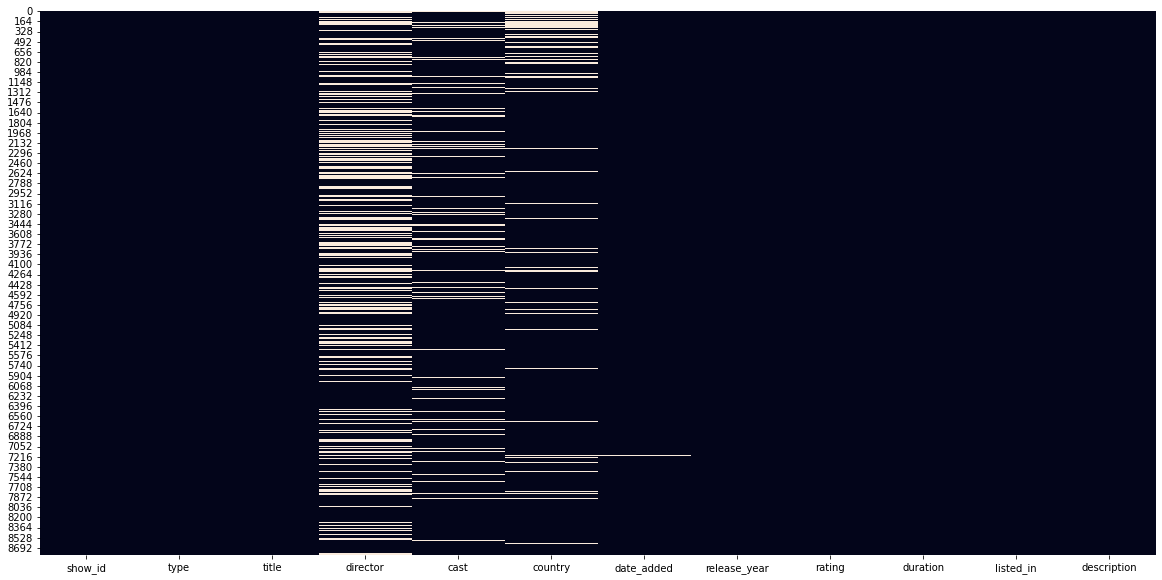

In [5]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)

As we can see there is a lot of null values in **director, cast and country column**

In [6]:
#Data Cleaning, Dealing with null values and changing to right datatype
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['director'].replace(np.nan, 'No Data',inplace  = True)
df['country'].replace(np.nan, 'No Data',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df.drop_duplicates(inplace= True)

In [7]:
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

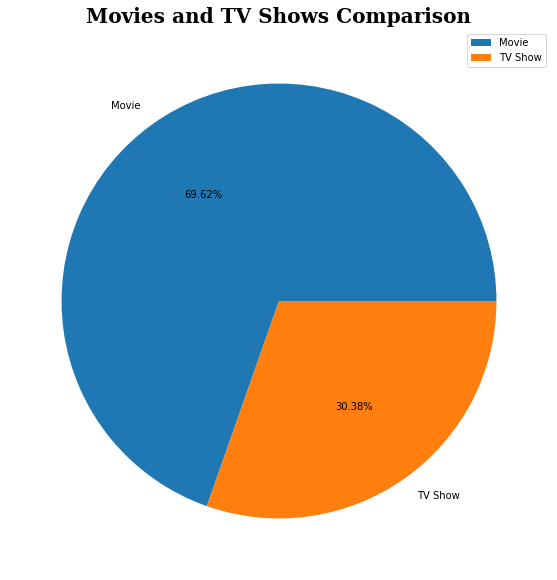

In [8]:
#compairing Movies and TV Show
cat = df['type'].value_counts().rename_axis('type').reset_index(name='counts')
fig = plt.figure(figsize=(10,10))
# plt.bar(cat['type'],cat['counts'])
plt.pie(x=cat['counts'], labels=cat['type'], autopct='%1.2f%%')
plt.legend()
plt.title('Movies and TV Shows Comparison', fontfamily='serif',fontweight='bold',fontsize=20)
plt.show()

Almost **70% Movies** and **30%TV Shows**

In [9]:
#in some rows there are more then one one values in country column, it is not good
#to deal with this problem, going to make a new column wiht the first country

df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
countries = df['first_country'].value_counts().rename_axis('country').reset_index(name='counts')

#droping no data values
countries.drop(2, axis=0, inplace=True)

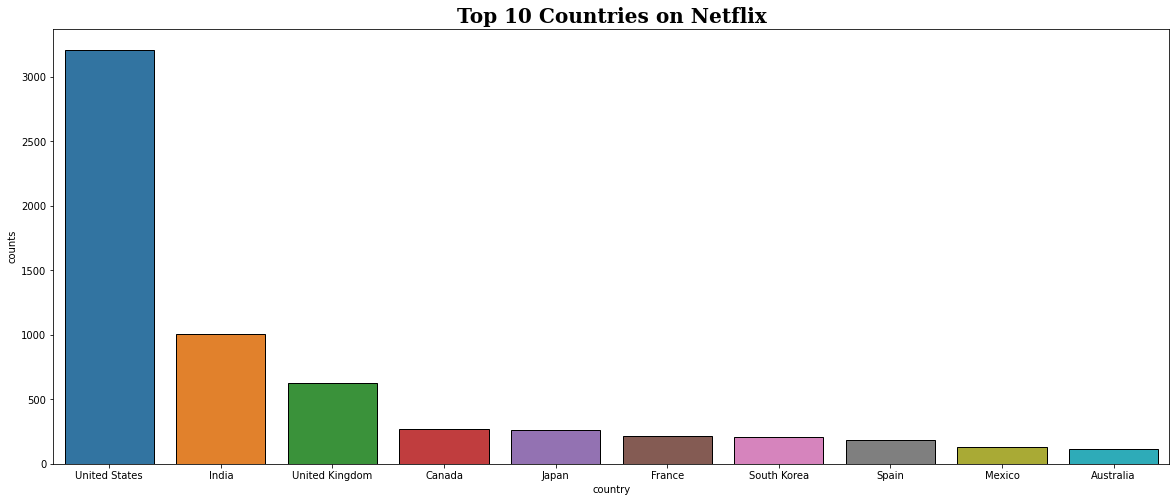

In [10]:
#plotting top 10 countries
fig = plt.figure(figsize=(20,8))
sns.barplot(x=countries['country'].head(10),y=countries['counts'],edgecolor="black")
plt.title("Top 10 Countries on Netflix", fontfamily='serif',fontweight='bold',fontsize=20)
plt.show()

**United States** tops the chart followed by India and United Kingdom  
US is almost triple the ammount copaired to India

In [11]:
rating = netflix_movies['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
rating

,rating,counts
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


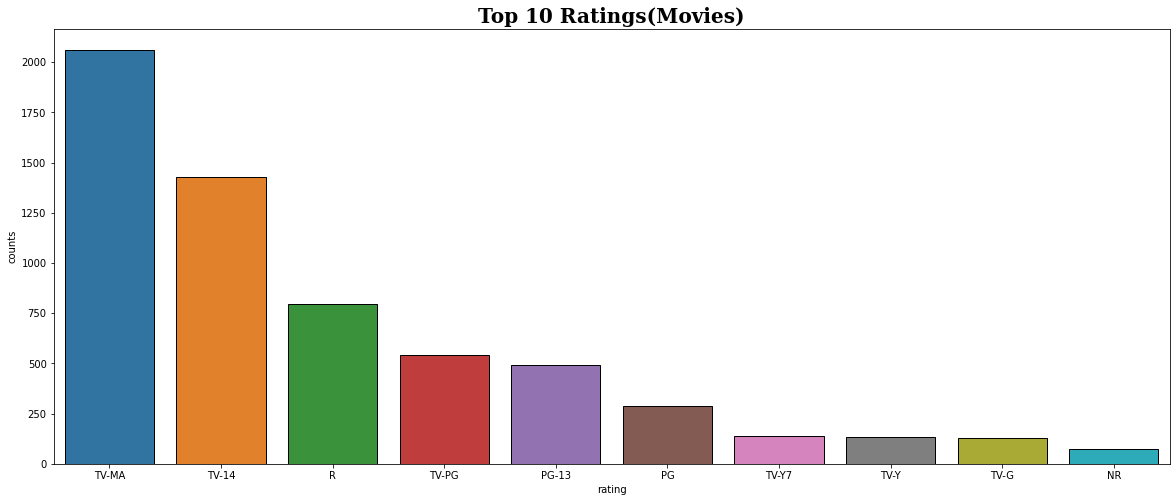

In [12]:
#plotting top 10 rating by counts
fig = plt.figure(figsize=(20,8))
sns.barplot(x=rating['rating'].head(10),y=rating['counts'], edgecolor="black")
plt.title("Top 10 Ratings(Movies)", fontfamily='serif',fontweight='bold',fontsize=20)
plt.show()

In [13]:
rating2 = netflix_shows['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
rating2

,rating,counts
0,TV-MA,1145
1,TV-14,733
2,TV-PG,323
3,TV-Y7,195
4,TV-Y,176
5,TV-G,94
6,NR,5
7,R,2
8,TV-Y7-FV,1


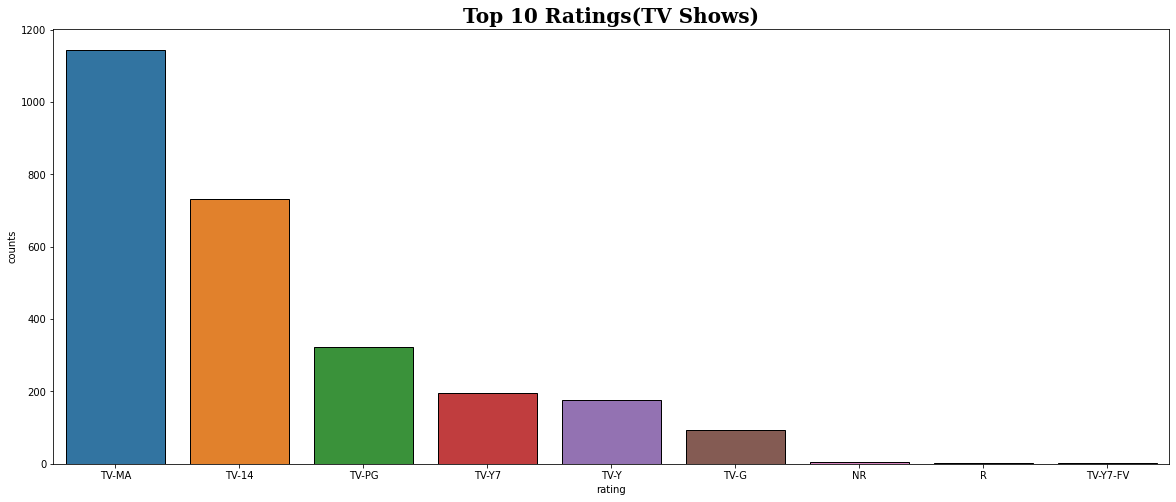

In [14]:
#plotting top 10 TV shows by rating
fig = plt.figure(figsize=(20,8))
sns.barplot(x=rating2['rating'].head(10),y=rating2['counts'],edgecolor="black")
plt.title("Top 10 Ratings(TV Shows)", fontfamily='serif',fontweight='bold',fontsize=20)
plt.show()

In [15]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,United States
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,No Data
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,No Data
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,United States
8803,s8804,TV Show,Zombie Dumb,No Data,No Data,No Data,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,No Data
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,United States
